<a href="https://colab.research.google.com/github/jonjonvps/RAG_LLM/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini projeto RAG


O motodor do Rag é um algoritmo de vizinhos próximos (KNN).

In [1]:
# MRPT - fast nearest neighbor search with random project
!pip install git+https://github.com/vioshyvo/mrpt

  Cloning https://github.com/vioshyvo/mrpt to /tmp/pip-req-build-ukv82zwm
  Running command git clone --filter=blob:none --quiet https://github.com/vioshyvo/mrpt /tmp/pip-req-build-ukv82zwm
  Resolved https://github.com/vioshyvo/mrpt to commit 823622cadb7b9817396e6ebbc31e1d7c1725231e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mrpt: filename=mrpt-2.0.1-cp311-cp311-linux_x86_64.whl size=2062738 sha256=a09e04f34cf672d7b6768edb1fbcb6a3b47a2571bd5a14913f0f809cfc54e4a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-x12dxdmu/wheels/ae/19/e8/1f91df5d4e7be72d3c4d21cb05a1dc92e8df1450f78557be2b
Successfully built mrpt


Instalação de um banco de dados orientado a vetor em python

In [2]:
!pip install vectordb2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
!pip install langchain

In [16]:
#@title resgatando documento-base
import requests
bruto_texto = requests.get('https://raw.githubusercontent.com/abjur/constituicao/refs/heads/main/CONSTITUICAO.md').text
display(bruto_texto)

'# Constituição da República Federativa do Brasil\n\n **Preâmbulo**\n\nNós, representantes do povo brasileiro, reunidos em Assembléia Nacional Constituinte para instituir um Estado Democrático, destinado a assegurar o exercício dos direitos sociais e individuais, a liberdade, a segurança, o bem-estar, o desenvolvimento, a igualdade e a justiça como valores supremos de uma sociedade fraterna, pluralista e sem preconceitos, fundada na harmonia social e comprometida, na ordem interna e internacional, com a solução pacífica das controvérsias, promulgamos, sob a proteção de Deus, a seguinte CONSTITUIÇÃO DA REPÚBLICA FEDERATIVA DO BRASIL.\n\n## Título I: Dos Princípios Fundamentais\n\n**Art. 1º** A República Federativa do Brasil, formada pela união indissolúvel dos Estados e Municípios e do Distrito Federal, constitui-se em Estado democrático de direito e tem como fundamentos:\n\n\u2003\u2003I - a soberania;\n\n\u2003\u2003II - a cidadania;\n\n\u2003\u2003III - a dignidade da pessoa humana;\

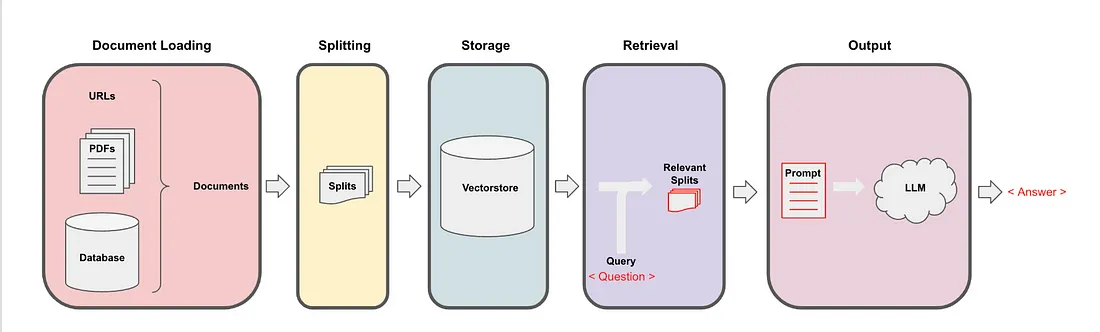

### Ver mais em: [Using langchain for Question Answering on Own Data](https://medium.com/@onkarmishra/using-langchain-for-question-answering-on-own-data-3af0a82789ed)

In [5]:
#@title Text Splitting
import re

padrao_capitulos = r'^##\s+(.*)$'
sections = re.split(padrao_capitulos, bruto_texto, flags=re.MULTILINE)
sections = [section.strip() for section in sections[1:]]

In [6]:
sections[:2]

['Título I: Dos Princípios Fundamentais',
 '**Art. 1º** A República Federativa do Brasil, formada pela união indissolúvel dos Estados e Municípios e do Distrito Federal, constitui-se em Estado democrático de direito e tem como fundamentos:\n\n\u2003\u2003I - a soberania;\n\n\u2003\u2003II - a cidadania;\n\n\u2003\u2003III - a dignidade da pessoa humana;\n\n\u2003\u2003IV - os valores sociais do trabalho e da livre iniciativa;\n\n\u2003\u2003V - o pluralismo político.\n\n\u2003**Parágrafo único.** Todo o poder emana do povo, que o exerce por meio de representantes eleitos ou diretamente, nos termos desta Constituição.\n\n**Art. 2º** São Poderes da União, independentes e harmônicos entre si, o Legislativo, o Executivo e o Judiciário.\n\n**Art. 3º** Constituem objetivos fundamentais da República Federativa do Brasil:\n\n\u2003\u2003I - construir uma sociedade livre, justa e solidária;\n\n\u2003\u2003II - garantir o desenvolvimento nacional;\n\n\u2003\u2003III - erradicar a pobreza e a mar

In [7]:
#@title Modo Integrado: Langchain

from langchain.text_splitter import MarkdownHeaderTextSplitter

padrao_capitulos = [
    ("##", "Capitulo")
]

markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=padrao_capitulos
)
sections = markdown_splitter.split_text(bruto_texto)

# Mais tipos de text splitting: [Text Splitters](https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/)

In [8]:
sections[:2]

[Document(metadata={}, page_content='# Constituição da República Federativa do Brasil  \n**Preâmbulo**  \nNós, representantes do povo brasileiro, reunidos em Assembléia Nacional Constituinte para instituir um Estado Democrático, destinado a assegurar o exercício dos direitos sociais e individuais, a liberdade, a segurança, o bem-estar, o desenvolvimento, a igualdade e a justiça como valores supremos de uma sociedade fraterna, pluralista e sem preconceitos, fundada na harmonia social e comprometida, na ordem interna e internacional, com a solução pacífica das controvérsias, promulgamos, sob a proteção de Deus, a seguinte CONSTITUIÇÃO DA REPÚBLICA FEDERATIVA DO BRASIL.'),
 Document(metadata={'Capitulo': 'Título I: Dos Princípios Fundamentais'}, page_content='**Art. 1º** A República Federativa do Brasil, formada pela união indissolúvel dos Estados e Municípios e do Distrito Federal, constitui-se em Estado democrático de direito e tem como fundamentos:  \nI - a soberania;  \nII - a cidadan

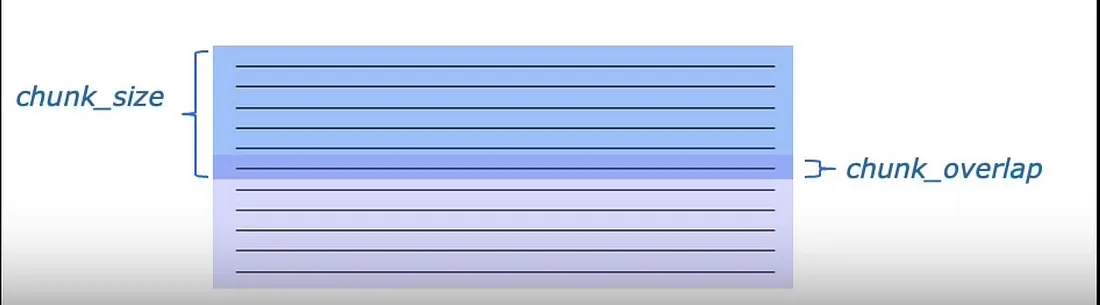

In [10]:
#@title Criando VectorDB

# testando chunk size e overlap
'''
from langchain.text_splitter import RecursiveCharacterTextSplitter

chunk_size = 20
chunk_overlap = 3

text = " A República Federativa do Brasil, formada pela união indissolúvel dos Estados e Municípios e do Distrito Federal"
splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

chunks = splitter.split_text(text)

for chunk in chunks:
    print(chunk)
    print()
'''

A República

Federativa do

do Brasil, formada

pela união

indissolúvel dos

Estados e

e Municípios e do

do Distrito Federal



In [12]:
#@title Embeddings

from vectordb import Memory

memory = Memory(chunking_strategy={"mode":"sliding_window", "window_size": 128, "overlap": 8})


Initiliazing embeddings:  normal


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

OK.


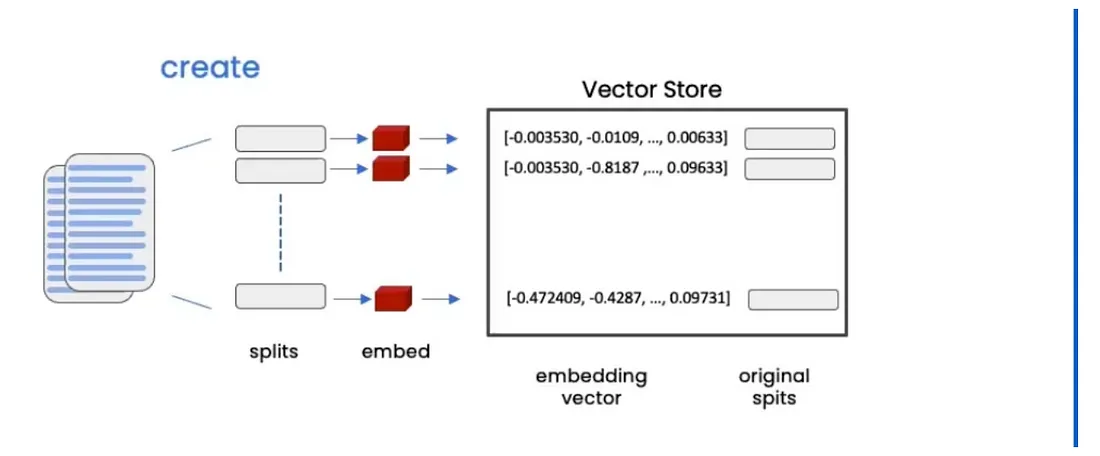

In [13]:
#@title Indexando os dados no VectorDB

for i in range(0, len(sections)):
  capitulo = sections[i].metadata
  texto = sections[i].page_content
  metadata = {'capitula': capitulo, 'origem':'constituicao federal'}

  memory.save(texto, metadata)

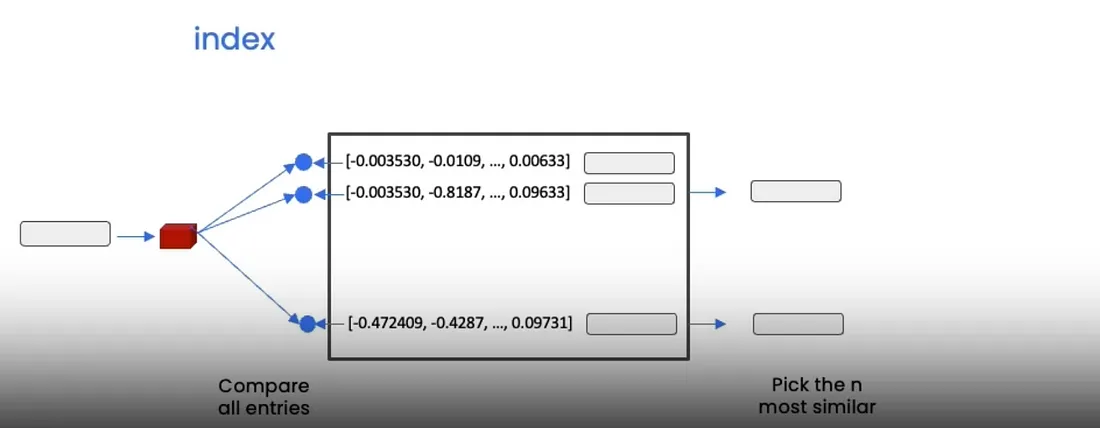

In [14]:
#@title testando busca semântica

memory.search('direitos dos trabalhadores', top_n=5)

[{'chunk': 'direitos sociais a educação, a saúde, a alimentação, o trabalho, a moradia, o transporte, o lazer, a segurança, a previdência social, a proteção à maternidade e à infância, a assistência aos desamparados, na forma desta Constituição. **Art. 7º** São direitos dos trabalhadores urbanos e rurais, além de outros que visem à melhoria de sua condição social: I - relação de emprego protegida contra despedida arbitrária ou sem justa causa, nos termos de lei complementar, que preverá indenização compensatória, dentre outros direitos; II - seguro-desemprego, em caso de desemprego involuntário; III - fundo de garantia do tempo de serviço; IV - salário mínimo, fixado em lei, nacionalmente unificado, capaz de atender às suas necessidades vitais básicas e às de sua família com moradia, alimentação, educação, saúde, lazer, vestuário, higiene,',
  'metadata': {'capitula': {'Capitulo': 'Título II: Dos Direitos e Garantias Fundamentais'},
   'origem': 'constituicao federal'},
  'distance': n